In [132]:
import pandas as pd

In [133]:
data = pd.read_csv('/content/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
data.shape

(30, 2)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [137]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [138]:
data.isnull().sum()


,0
YearsExperience,0
Salary,0


In [139]:
data.isna().sum().sum()

0

In [140]:
len(data)*0.05

1.5

In [141]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [142]:
for ifc in data.select_dtypes(include=['float64','int64']).columns:
  if (data[ifc].skew()>0.5):
    print(ifc,'skewd')
    data[ifc] = data[ifc].fillna(data[ifc].median())
  else:
    print(ifc,'Normal')
    data[ifc] = data[ifc].fillna(data[ifc].mean())

YearsExperience Normal
Salary Normal


In [143]:
data.isnull().sum()


,0
YearsExperience,0
Salary,0


YearsExperience


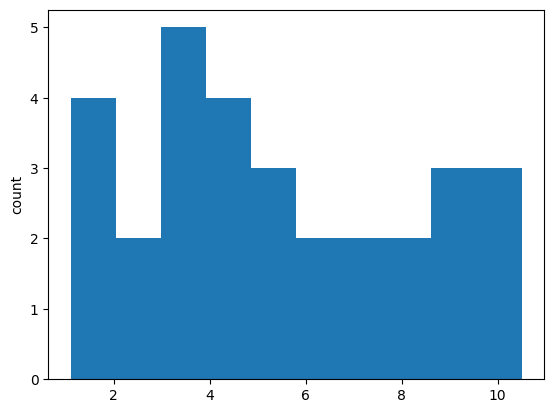

Salary


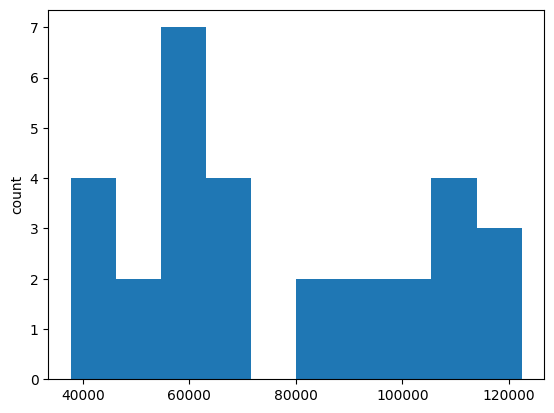

In [144]:
for i in data.select_dtypes(include=['float64','int64']).columns:
  plt.hist(data[i])
  print(i)
  plt.ylabel('count')
  plt.show()

In [145]:
 for i in data.select_dtypes(include='object_'):
  plt.figure(figsize=(8,8))
  cnt=data[i].value_counts()
  plt.title(i)
  plt.pie(cnt,labels=cnt.index,autopct='%1.1f%%',startangle=90)
  plt.axis('equal')
  plt.show()

In [146]:
y=data.iloc[:,-1]
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


YearsExperience


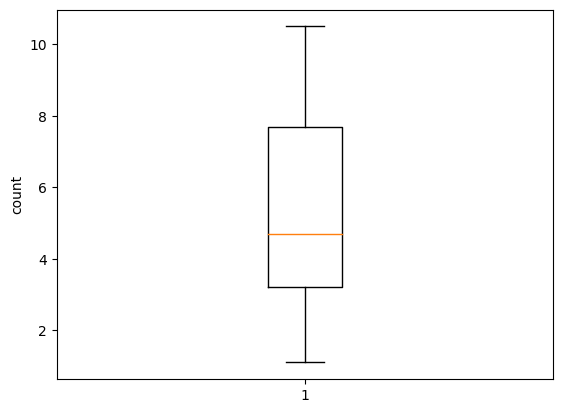

Salary


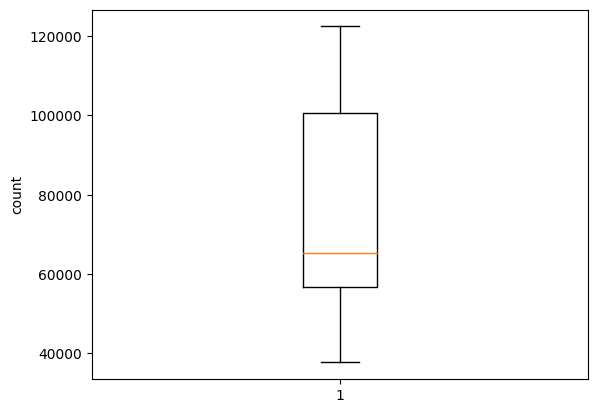

In [147]:
for i in data.select_dtypes(include=['float64','int64']).columns:
    plt.boxplot(data[i])
    print(i)
    plt.ylabel("count")
    plt.show()

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

Index(['YearsExperience', 'Salary'], dtype='object')


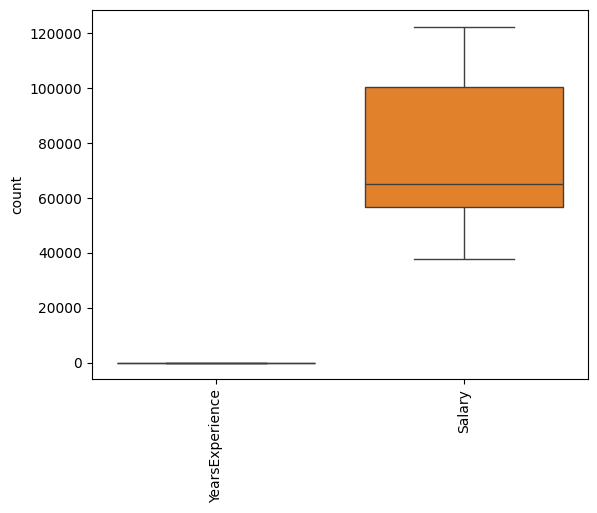

In [149]:
ddd=data.select_dtypes(include=['float64','int64']).columns
print(ddd)
sns.boxplot(data[ddd])
plt.xticks(rotation='vertical')
plt.ylabel("count")
plt.show()

In [150]:
outlier_list=['YearsExperience','Salary']
for i in outlier_list:
  Q1=data[i].quantile(0.25)
  Q3=data[i].quantile(0.75)
  IQR=Q3-Q1
  data=data[(data[i]>=Q1-1.5*IQR) & (data[i]<=Q3+1.5*IQR)]

In [151]:
data.shape

(30, 2)

In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inflation=[]
for i in data.columns:
  if((data[i].dtype!='object')&(i!='charges')):
    var_inflation.append(i)
x=data[var_inflation]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif_data

,feature,VIF
0,YearsExperience,37.145972
1,Salary,37.145972


In [153]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [154]:
data=data.drop(['YearsExperience'],axis=1)

In [155]:
x

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [156]:
y = data.iloc[:, -1]
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [158]:
x

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.80,random_state=999)
x_train

,YearsExperience,Salary
26,9.5,116969.0
8,3.2,64445.0
1,1.3,46205.0
5,2.9,56642.0
28,10.3,122391.0
0,1.1,39343.0


In [160]:
x_test.shape

(24, 2)

In [161]:
x_test

,YearsExperience,Salary
14,4.5,61111.0
21,7.1,98273.0
29,10.5,121872.0
23,8.2,113812.0
3,2.0,43525.0
24,8.7,109431.0
12,4.0,56957.0
9,3.7,57189.0
18,5.9,81363.0
6,3.0,60150.0


In [162]:
y_test.shape

(24,)

In [163]:
y_test

,Salary
14,61111.0
21,98273.0
29,121872.0
23,113812.0
3,43525.0
24,109431.0
12,56957.0
9,57189.0
18,81363.0
6,60150.0


In [164]:
l_model=LinearRegression()
l_model.fit(x_train,y_train)

LinearRegression()

In [165]:
predictions=l_model.predict(x_test)
predictions

array([ 61111.,  98273., 121872., 113812.,  43525., 109431.,  56957.,
        57189.,  81363.,  60150.,  63218.,  39891.,  54445.,  83088.,
        67938.,  55794.,  37731., 112635., 101302.,  91738., 105582.,
        57081.,  66029.,  93940.])

In [166]:
from sklearn.metrics import*
r2score=r2_score(y_test,predictions)
r2score

1.0

In [167]:
x_test

,YearsExperience,Salary
14,4.5,61111.0
21,7.1,98273.0
29,10.5,121872.0
23,8.2,113812.0
3,2.0,43525.0
24,8.7,109431.0
12,4.0,56957.0
9,3.7,57189.0
18,5.9,81363.0
6,3.0,60150.0


In [168]:
a = l_model.predict([[3, 0]])
print(a)

[2.25080257e-12]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [169]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [170]:
x_pred = l_model.predict(x_test)

In [171]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.75,random_state=1)

In [172]:
x_train


,YearsExperience,Salary
29,10.5,121872.0
28,10.3,122391.0
9,3.7,57189.0
8,3.2,64445.0
12,4.0,56957.0
11,4.0,55794.0
5,2.9,56642.0


In [173]:
x_train.shape

(7, 2)

In [174]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [175]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)

In [176]:
y_pred=lr.predict(x_test)

In [177]:
y_pred

array([122391., 122391., 122391., 122391., 122391., 122391., 122391.,
       122391., 122391., 122391., 122391., 122391., 122391., 122391.,
       122391., 122391., 122391., 122391., 122391., 122391., 122391.,
       122391., 122391.])

In [178]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [179]:
accuracy_score(y_test,y_pred)

0.0

In [180]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1],
       [0, 0, 0, 0, 0

In [181]:
y_test

,Salary
17,83088.0
21,98273.0
10,63218.0
19,93940.0
14,61111.0
20,91738.0
26,116969.0
3,43525.0
24,109431.0
22,101302.0


In [182]:
lr.predict([[10.5,121872.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([122391.])